In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv('/content/data.csv')

In [91]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [92]:
#Let's see how much are the missing values from the datset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 1432, which is 0.72% of total data.


In [93]:
#Missing data columns wise
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

Yearly_avg_view_on_travel_page has 581 missing values, which is 4.94% of the column.
preferred_device has 53 missing values, which is 0.45% of the column.
total_likes_on_outstation_checkin_given has 381 missing values, which is 3.24% of the column.
yearly_avg_Outstation_checkins has 75 missing values, which is 0.64% of the column.
preferred_location_type has 31 missing values, which is 0.26% of the column.
Yearly_avg_comment_on_travel_page has 206 missing values, which is 1.75% of the column.
following_company_page has 103 missing values, which is 0.88% of the column.
Adult_flag has 1 missing values, which is 0.01% of the column.
Daily_Avg_mins_spend_on_traveling_page has 1 missing values, which is 0.01% of the column.


In [94]:
df.isnull()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11756,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11758,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [95]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [96]:
missing_value=["N/a","na","*",np.nan]
df = pd.read_csv("data.csv", na_values = missing_value)

In [97]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   76
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [98]:
df.isnull().any()


UserID                                          False
Taken_product                                   False
Yearly_avg_view_on_travel_page                   True
preferred_device                                 True
total_likes_on_outstation_checkin_given          True
yearly_avg_Outstation_checkins                   True
member_in_family                                False
preferred_location_type                          True
Yearly_avg_comment_on_travel_page                True
total_likes_on_outofstation_checkin_received    False
week_since_last_outstation_checkin              False
following_company_page                           True
montly_avg_comment_on_company_page              False
working_flag                                    False
travelling_network_rating                       False
Adult_flag                                       True
Daily_Avg_mins_spend_on_traveling_page           True
dtype: bool

<Axes: >

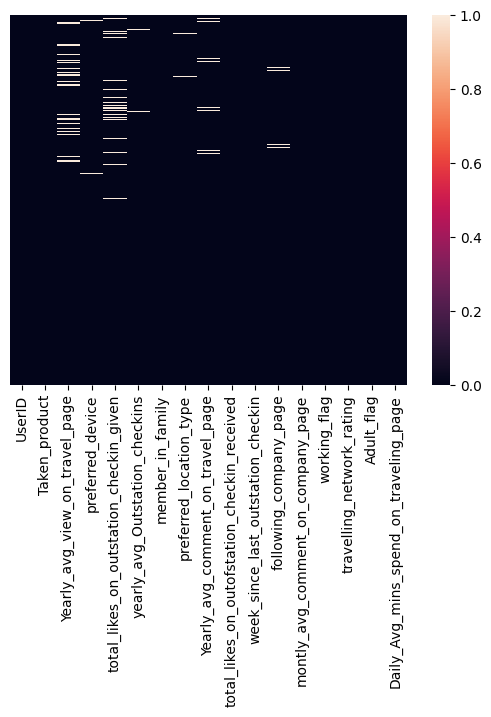

In [99]:
sns.heatmap(df.isnull(),yticklabels=False)

In [100]:
df

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [101]:
df.dropna()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [102]:
df.dropna(how='all')

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [103]:
df.fillna(0)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [104]:
df.fillna(method='ffill')

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [105]:
df.fillna(method='bfill')

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [106]:
df.interpolate()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1.0,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1.0,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1.0,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1.0,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1.0,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6.0,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4.0,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2.0,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [107]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
# Removing the Outlier in the "Win_by_wickets"

import pandas as pd

df = pd.read_csv("/content/data.csv")

# Calculate the IQR
q1 = df['Yearly_avg_view_on_travel_page'].quantile(0.25)
q3 = df['Yearly_avg_view_on_travel_page'].quantile(0.75)
iqr = q3 - q1

# Identify the outliers
outliers = df['Yearly_avg_view_on_travel_page'][((df['Yearly_avg_view_on_travel_page'] < q1 - 1.5 * iqr) | (df['Yearly_avg_view_on_travel_page'] > q3 + 1.5 * iqr))]

# Remove the outliers
df = df.drop(outliers.index)

# Print the cleaned dataframe
print(df)

        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                           307.0  iOS and Android   
1      1000002            No                           367.0              iOS   
2      1000003           Yes                           277.0  iOS and Android   
3      1000004            No                           247.0              iOS   
4      1000005            No                           202.0  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outst

In [108]:
df = pd.read_csv('/content/data.csv')

df.head(10)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0.0,8.0
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3.0,12.0
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1.0,1.0
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0.0,10.0
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2.0,17.0


In [109]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_typ

In [110]:
# Calculate the mean of the 'Yearly_avg_view_on_travel_page' column
mean_value = df['Yearly_avg_view_on_travel_page'].mean()
# Replace missing values in the 'Yearly_avg_view_on_travel_page' column with the mean value
df['Yearly_avg_view_on_travel_page'].fillna(mean_value, inplace=True)

In [111]:
# Handling Missing Data
df.dropna(inplace=True)


# Removing Duplicates
df.drop_duplicates(inplace=True)

In [112]:
# Calculate the mode of the 'preferred_location_type' column
mode_value = df['preferred_location_type'].mode()[0]

# Replace missing values in the 'preferred_location_type' column with the mode value
df['preferred_location_type'].fillna(mode_value, inplace=True)

In [113]:
# Convert columns to numeric type
numeric_columns = df.columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate mean values of each column
mean_values = df.mean()

# Print the mean values
print("Mean Values:")
print(mean_values)

Mean Values:
UserID                                          1.006129e+06
Taken_product                                            NaN
Yearly_avg_view_on_travel_page                  2.812525e+02
preferred_device                                         NaN
total_likes_on_outstation_checkin_given         2.811892e+04
yearly_avg_Outstation_checkins                  8.260155e+00
member_in_family                                2.921524e+00
preferred_location_type                                  NaN
Yearly_avg_comment_on_travel_page               7.500931e+01
total_likes_on_outofstation_checkin_received    6.539667e+03
week_since_last_outstation_checkin              3.216046e+00
following_company_page                          6.875000e-01
montly_avg_comment_on_company_page              2.887870e+01
working_flag                                             NaN
travelling_network_rating                       2.712212e+00
Adult_flag                                      7.977364e-01
Daily_Avg_m

In [114]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Handle non-numeric values (for example, replace them with NaN)
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Now that non-numeric values are converted to NaN, you can calculate the median
median_values = df.median()

print("Median Values:")
print(median_values)

Median Values:
UserID                                          1006282.5
Taken_product                                         NaN
Yearly_avg_view_on_travel_page                      275.0
preferred_device                                      NaN
total_likes_on_outstation_checkin_given           28042.0
yearly_avg_Outstation_checkins                        4.0
member_in_family                                      3.0
preferred_location_type                               NaN
Yearly_avg_comment_on_travel_page                    75.0
total_likes_on_outofstation_checkin_received       4941.0
week_since_last_outstation_checkin                    3.0
following_company_page                                1.0
montly_avg_comment_on_company_page                   23.0
working_flag                                          NaN
travelling_network_rating                             3.0
Adult_flag                                            1.0
Daily_Avg_mins_spend_on_traveling_page               12.0

In [115]:
# Calculate the mode for each column
mode_values = df.mode().iloc[0]

# Now mode_values contains the mode for each column in your DataFrame
print(mode_values)

UserID                                          1.000001e+06
Taken_product                                            NaN
Yearly_avg_view_on_travel_page                  2.808308e+02
preferred_device                                         NaN
total_likes_on_outstation_checkin_given         1.151500e+04
yearly_avg_Outstation_checkins                  1.000000e+00
member_in_family                                3.000000e+00
preferred_location_type                                  NaN
Yearly_avg_comment_on_travel_page               9.000000e+01
total_likes_on_outofstation_checkin_received    2.377000e+03
week_since_last_outstation_checkin              1.000000e+00
following_company_page                          1.000000e+00
montly_avg_comment_on_company_page              2.300000e+01
working_flag                                             NaN
travelling_network_rating                       3.000000e+00
Adult_flag                                      0.000000e+00
Daily_Avg_mins_spend_on_

In [116]:
summary_stats = df.describe()
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             UserID  Taken_product  Yearly_avg_view_on_travel_page  \
count  1.095600e+04            0.0                    10956.000000   
mean   1.006129e+06            NaN                      281.252487   
std    3.355728e+03            NaN                       66.693820   
min    1.000001e+06            NaN                       35.000000   
25%    1.003256e+06            NaN                      233.000000   
50%    1.006282e+06            NaN                      275.000000   
75%    1.009021e+06            NaN                      322.000000   
max    1.011760e+06            NaN                      464.000000   

       preferred_device  total_likes_on_outstation_checkin_given  \
count               0.0                             10956.000000   
mean                NaN                             28118.920318   
std                 NaN                             14196.408431   
min                 NaN                              3570.000000   
25%      

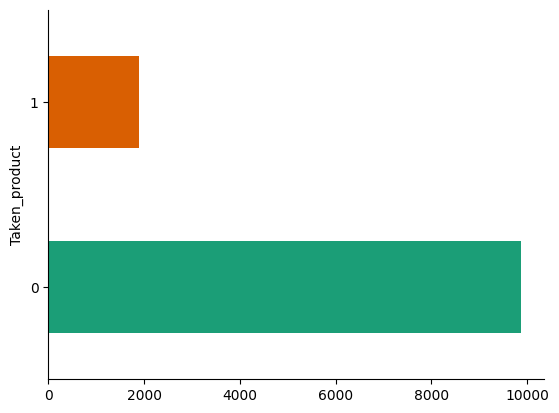

In [152]:
funnel_data = df[['UserID', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page', 'Taken_product']].copy()

funnel_stages = ['View Travel Page', 'Comment on Travel Page', 'Buy Product']

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
funnel_data['Buy Product'] = (funnel_data['Taken_product'] == 'Yes').astype(int)
funnel_data

from matplotlib import pyplot as plt
import seaborn as sns
funnel_data.groupby('Taken_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

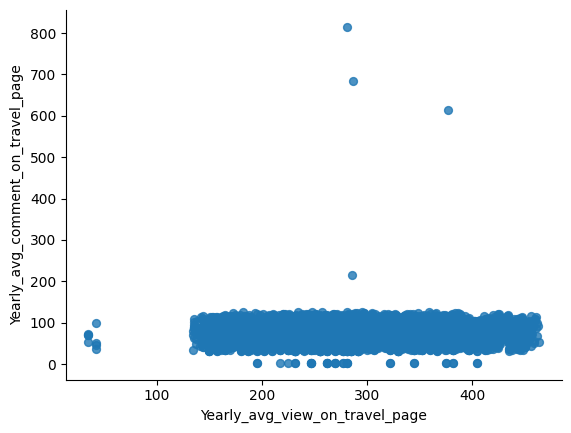

In [118]:
from matplotlib import pyplot as plt

funnel_data.plot(kind='scatter', x='Yearly_avg_view_on_travel_page', y='Yearly_avg_comment_on_travel_page', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

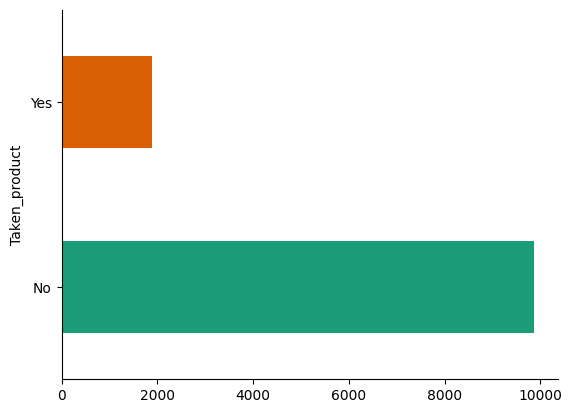

In [119]:
funnel_data = pd.read_csv('/content/data.csv')

# Check if the DataFrame contains any rows
if not funnel_data.empty:
    # Plot bar graph
    funnel_data.groupby('Taken_product').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()
else:
    print("DataFrame is empty. Please check your data file.")

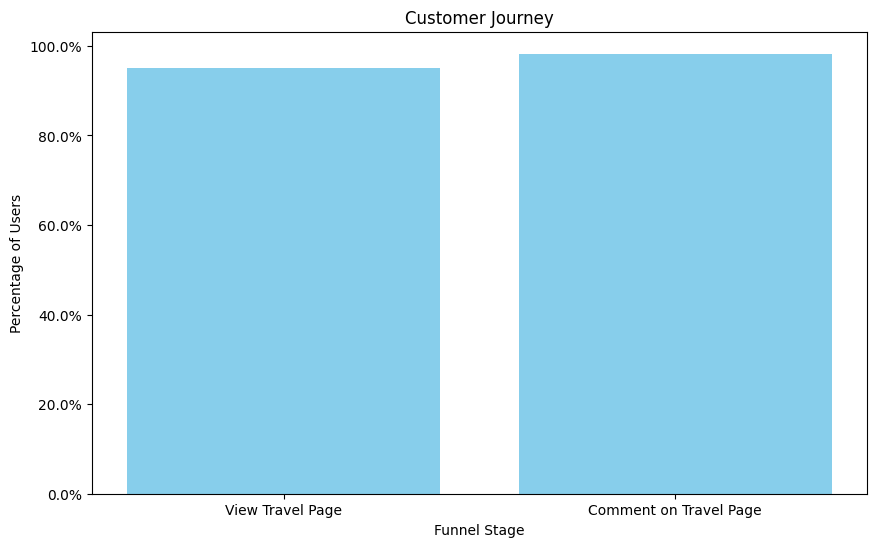

In [120]:
# Remove the line causing KeyError by using only existing columns
funnel_data['View Travel Page'] = funnel_data['Yearly_avg_view_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)
funnel_data['Comment on Travel Page'] = funnel_data['Yearly_avg_comment_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)

# List of funnel stages based on the columns in the dataset
funnel_stages = ['View Travel Page', 'Comment on Travel Page']

funnel_percentages = []
for stage in funnel_stages:
    percentage = funnel_data[stage].mean() * 100
    funnel_percentages.append(percentage)

# Funnel Visualization
plt.figure(figsize=(10, 6))
plt.bar(funnel_stages, funnel_percentages, color='skyblue')
plt.title('Customer Journey')
plt.xlabel('Funnel Stage')
plt.ylabel('Percentage of Users')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.show()

<ipython-input-150-1d729857575d>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




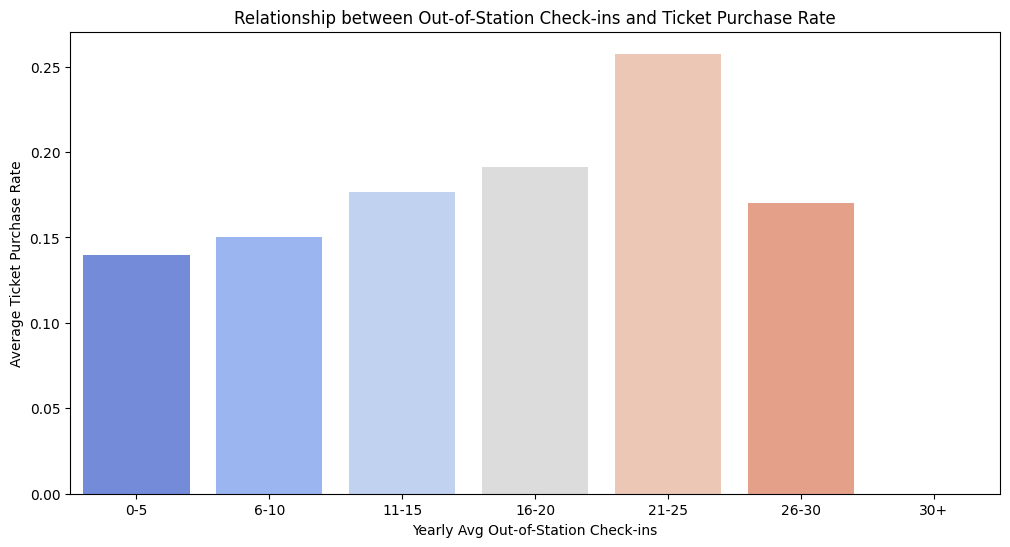

In [150]:
# Convert 'yearly_avg_Outstation_checkins' to numeric (in case it's not)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')

# Create bins for yearly average out-of-station check-ins
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']

df['Outstation_checkin_bins'] = pd.cut(df['yearly_avg_Outstation_checkins'], bins=bins, labels=labels, right=False)

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
df['Taken_product'] = (df['Taken_product'] == 'Yes').astype(int)

# Calculate the average ticket purchase rate for each bin
purchase_rate_by_bin = df.groupby('Outstation_checkin_bins')['Taken_product'].mean()

# Bar plot to visualize the relationship between out-of-station check-ins and ticket purchase rate
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_rate_by_bin.index, y=purchase_rate_by_bin.values, palette='coolwarm')
plt.title('Relationship between Out-of-Station Check-ins and Ticket Purchase Rate')
plt.xlabel('Yearly Avg Out-of-Station Check-ins')
plt.ylabel('Average Ticket Purchase Rate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



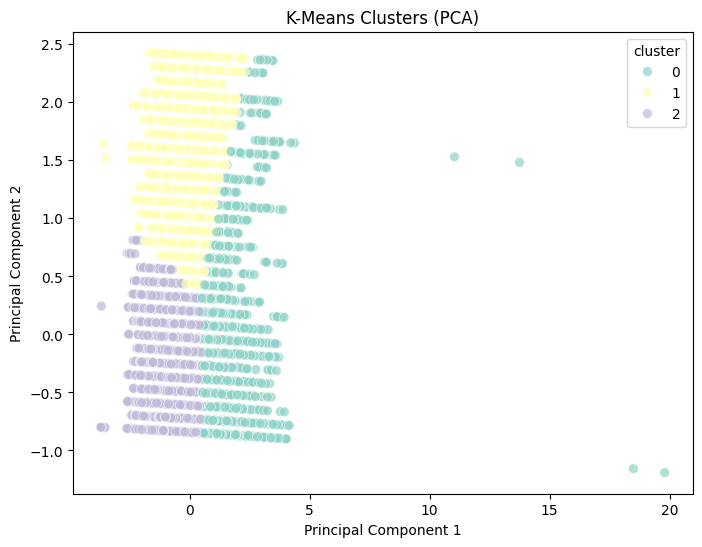

X_scaled after standardization:
[[ 0.38609331 -0.84268347 -0.64420296]
 [ 1.28573301 -0.84268347 -0.42533978]
 [-0.06372654 -0.84268347 -0.75363456]
 ...
 [-1.00834822 -0.4944746  -0.20647659]
 [ 1.51064294 -0.72661385  0.66897616]
 [-0.1686845  -0.03019611  0.0123866 ]]


In [122]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Remove any characters that cannot be converted to float
df_clustering = df_clustering.applymap(lambda x: np.nan if isinstance(x, str) and ('*' in x or pd.isna(x)) else x)
df_clustering = df_clustering.dropna()

# Extract the selected features
X = df_clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering (replace 3 with the desired number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility
kmeans.fit(X_scaled)

# Assign cluster labels to each data point
df_clustering['cluster'] = kmeans.labels_

# Visualize clusters using PCA for dimensionality reduction (if features > 2)
if X.shape[1] > 2:
    pca = PCA(n_components=2)  # Reduce to 2D for visualization
    pca_data = pca.fit_transform(X_scaled)

    # Scatter plot with color-coded clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=pca_data[:, 0],
        y=pca_data[:, 1],
        hue=df_clustering['cluster'],
        palette='Set3',
        alpha=0.7,
        s=50  # Adjust marker size as needed
    )
    plt.title('K-Means Clusters (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Alternatively, visualize in original feature space (if features <= 2)
else:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X.iloc[:, 0],
        y=X.iloc[:, 1],
        hue=df_clustering['cluster'],
        palette='Set3',
        alpha=0.7,
        s=50  # Adjust marker size as needed
    )
    plt.title('K-Means Clusters (Original Features)')
    plt.xlabel(features_for_clustering[0])
    plt.ylabel(features_for_clustering[1])
    plt.show()

print('X_scaled after standardization:')
print(X_scaled)


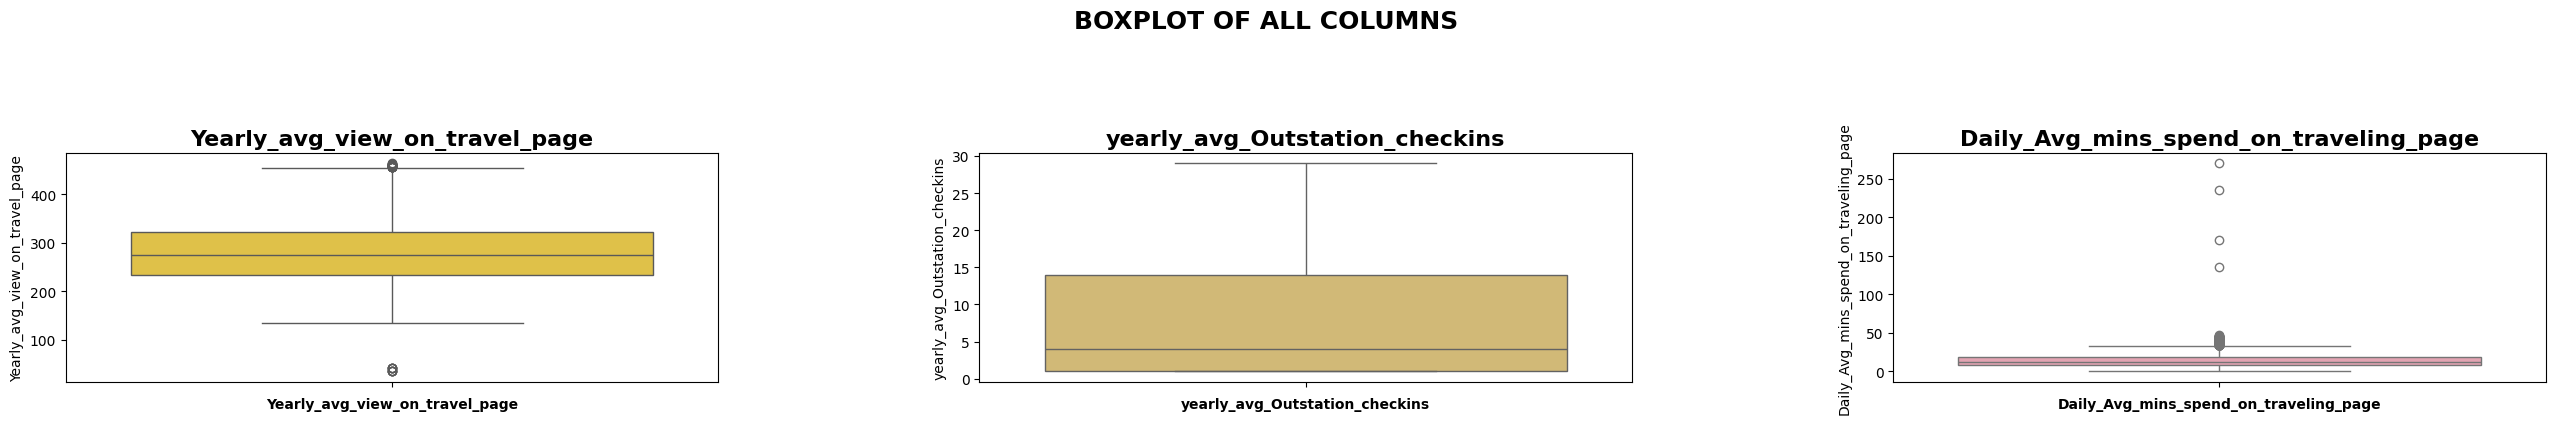

In [123]:
axlab_dict = {'fontsize': 10, 'fontweight': 'bold'}
axtitle_dict = {'fontsize': 12, 'fontweight': 'bold'}

# Define the list of colors
colours = ["#F8D030", "#E0C068", "#EE99AC"]

# Define the list of numeric columns
numeric_columns = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']

# Define the title formatting dictionary
axtitle_dict = {'fontsize': 16, 'fontweight': 'bold'}

# Generate the boxplots
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);

for i, col in enumerate(numeric_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data=df[col], color=colours[i % len(colours)]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

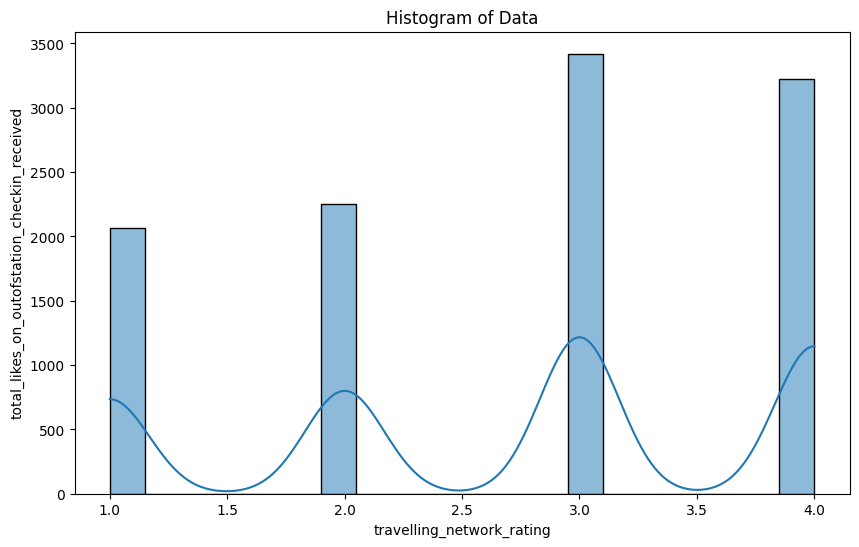

In [124]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['travelling_network_rating'], bins=20, kde=True)
plt.title("Histogram of Data")
plt.xlabel("travelling_network_rating")
plt.ylabel("total_likes_on_outofstation_checkin_received")
plt.show()

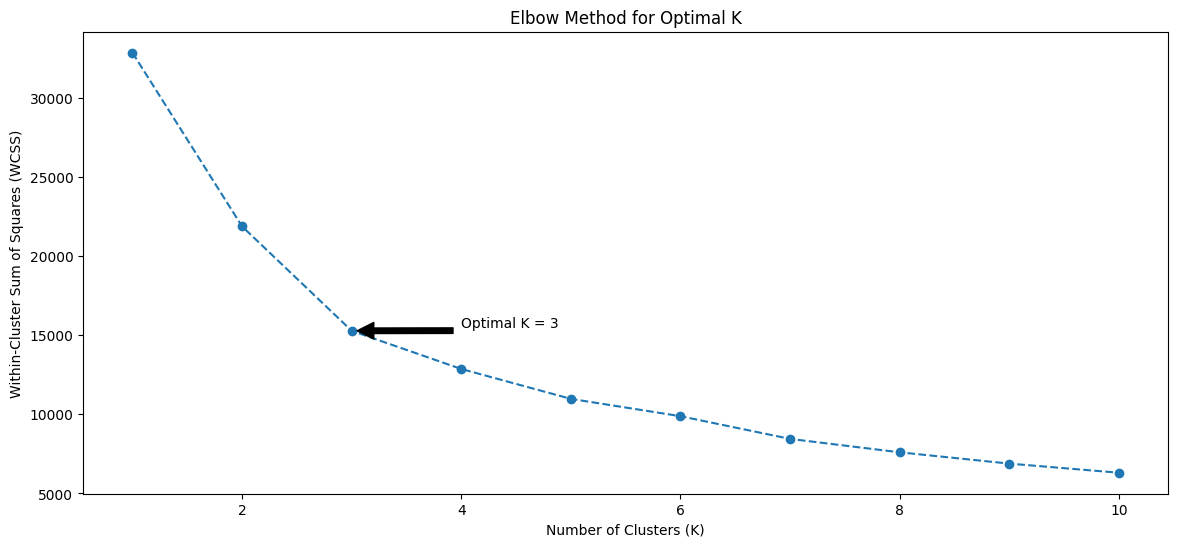

In [125]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(14, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Add markers for the optimal K value
plt.annotate('Optimal K = 3', xy=(3, wcss[2]), xytext=(4, wcss[2] + 200),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


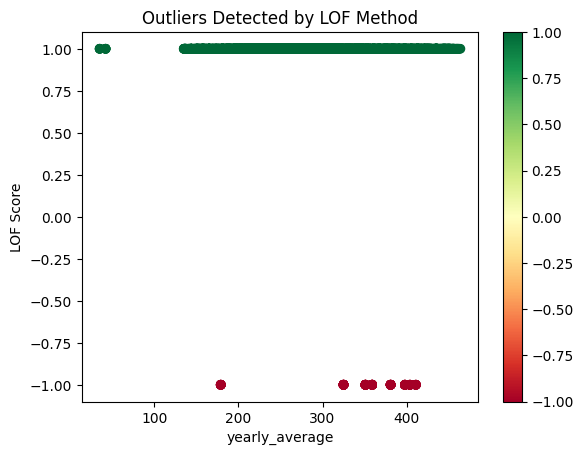

Outlier Data:
        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
3474   1003475            No                           398.0  iOS and Android   
4435   1004436            No                           398.0  iOS and Android   
4740   1004741            No                           325.0              iOS   
5056   1005057            No                           398.0  iOS and Android   
5059   1005060            No                           398.0  iOS and Android   
...        ...           ...                             ...              ...   
11623  1011624           Yes                           351.0              Tab   
11629  1011630           Yes                           179.0              Tab   
11694  1011695            No                           325.0           Mobile   
11698  1011699            No                           179.0              Tab   
11724  1011725            No                           398.0           Mobile   

       total_

In [126]:
#ashiq
# OUTLIER
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Load your credit card transactions dataset
data = pd.read_csv('/content/data.csv')
data1 = pd.read_csv('/content/data.csv')

# Drop null values --> Data Cleaning
data['Yearly_avg_view_on_travel_page'].fillna(data['Yearly_avg_view_on_travel_page'].median(), inplace=True)

# Select relevant features (assuming numerical encoding for categorical columns)
avg = data['Yearly_avg_view_on_travel_page'].values.reshape(-1, 1)  # Consider adding other relevant features for better outlier detection

clf = LocalOutlierFactor(n_neighbors=40, contamination=0.01)
outlier_scores = clf.fit_predict(avg)

# Get the outlier data
outlier_data = data[outlier_scores == -1]

# Plot the outliers
plt.scatter(data['Yearly_avg_view_on_travel_page'], outlier_scores, c=outlier_scores, cmap='RdYlGn')
plt.xlabel('yearly_average')
plt.ylabel('LOF Score')
plt.title('Outliers Detected by LOF Method')
plt.colorbar()
plt.show()


# Print the outlier data
print("Outlier Data:")
print(outlier_data)


In [127]:
missing = data_numeric.isnull().sum()
print(missing)

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



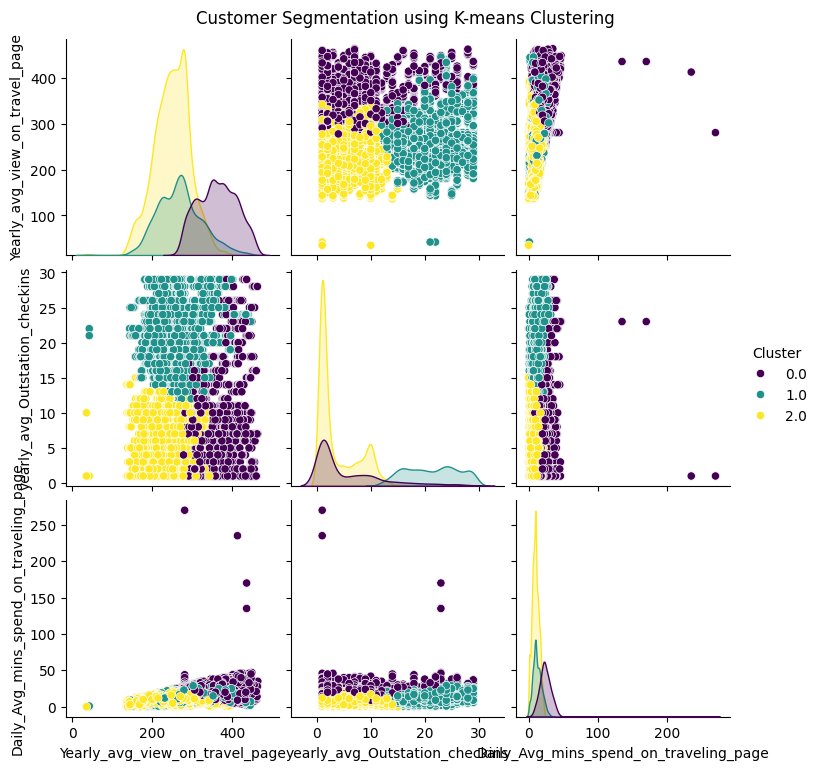

In [128]:
optimal_k = 3

# Apply K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

# Merge the clustering results back to the original dataframe
df = pd.merge(df, df_clustering[['Cluster']], left_index=True, right_index=True, how='left')

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', vars=features_for_clustering)
plt.suptitle('Customer Segmentation using K-means Clustering', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning:

Mean of empty slice



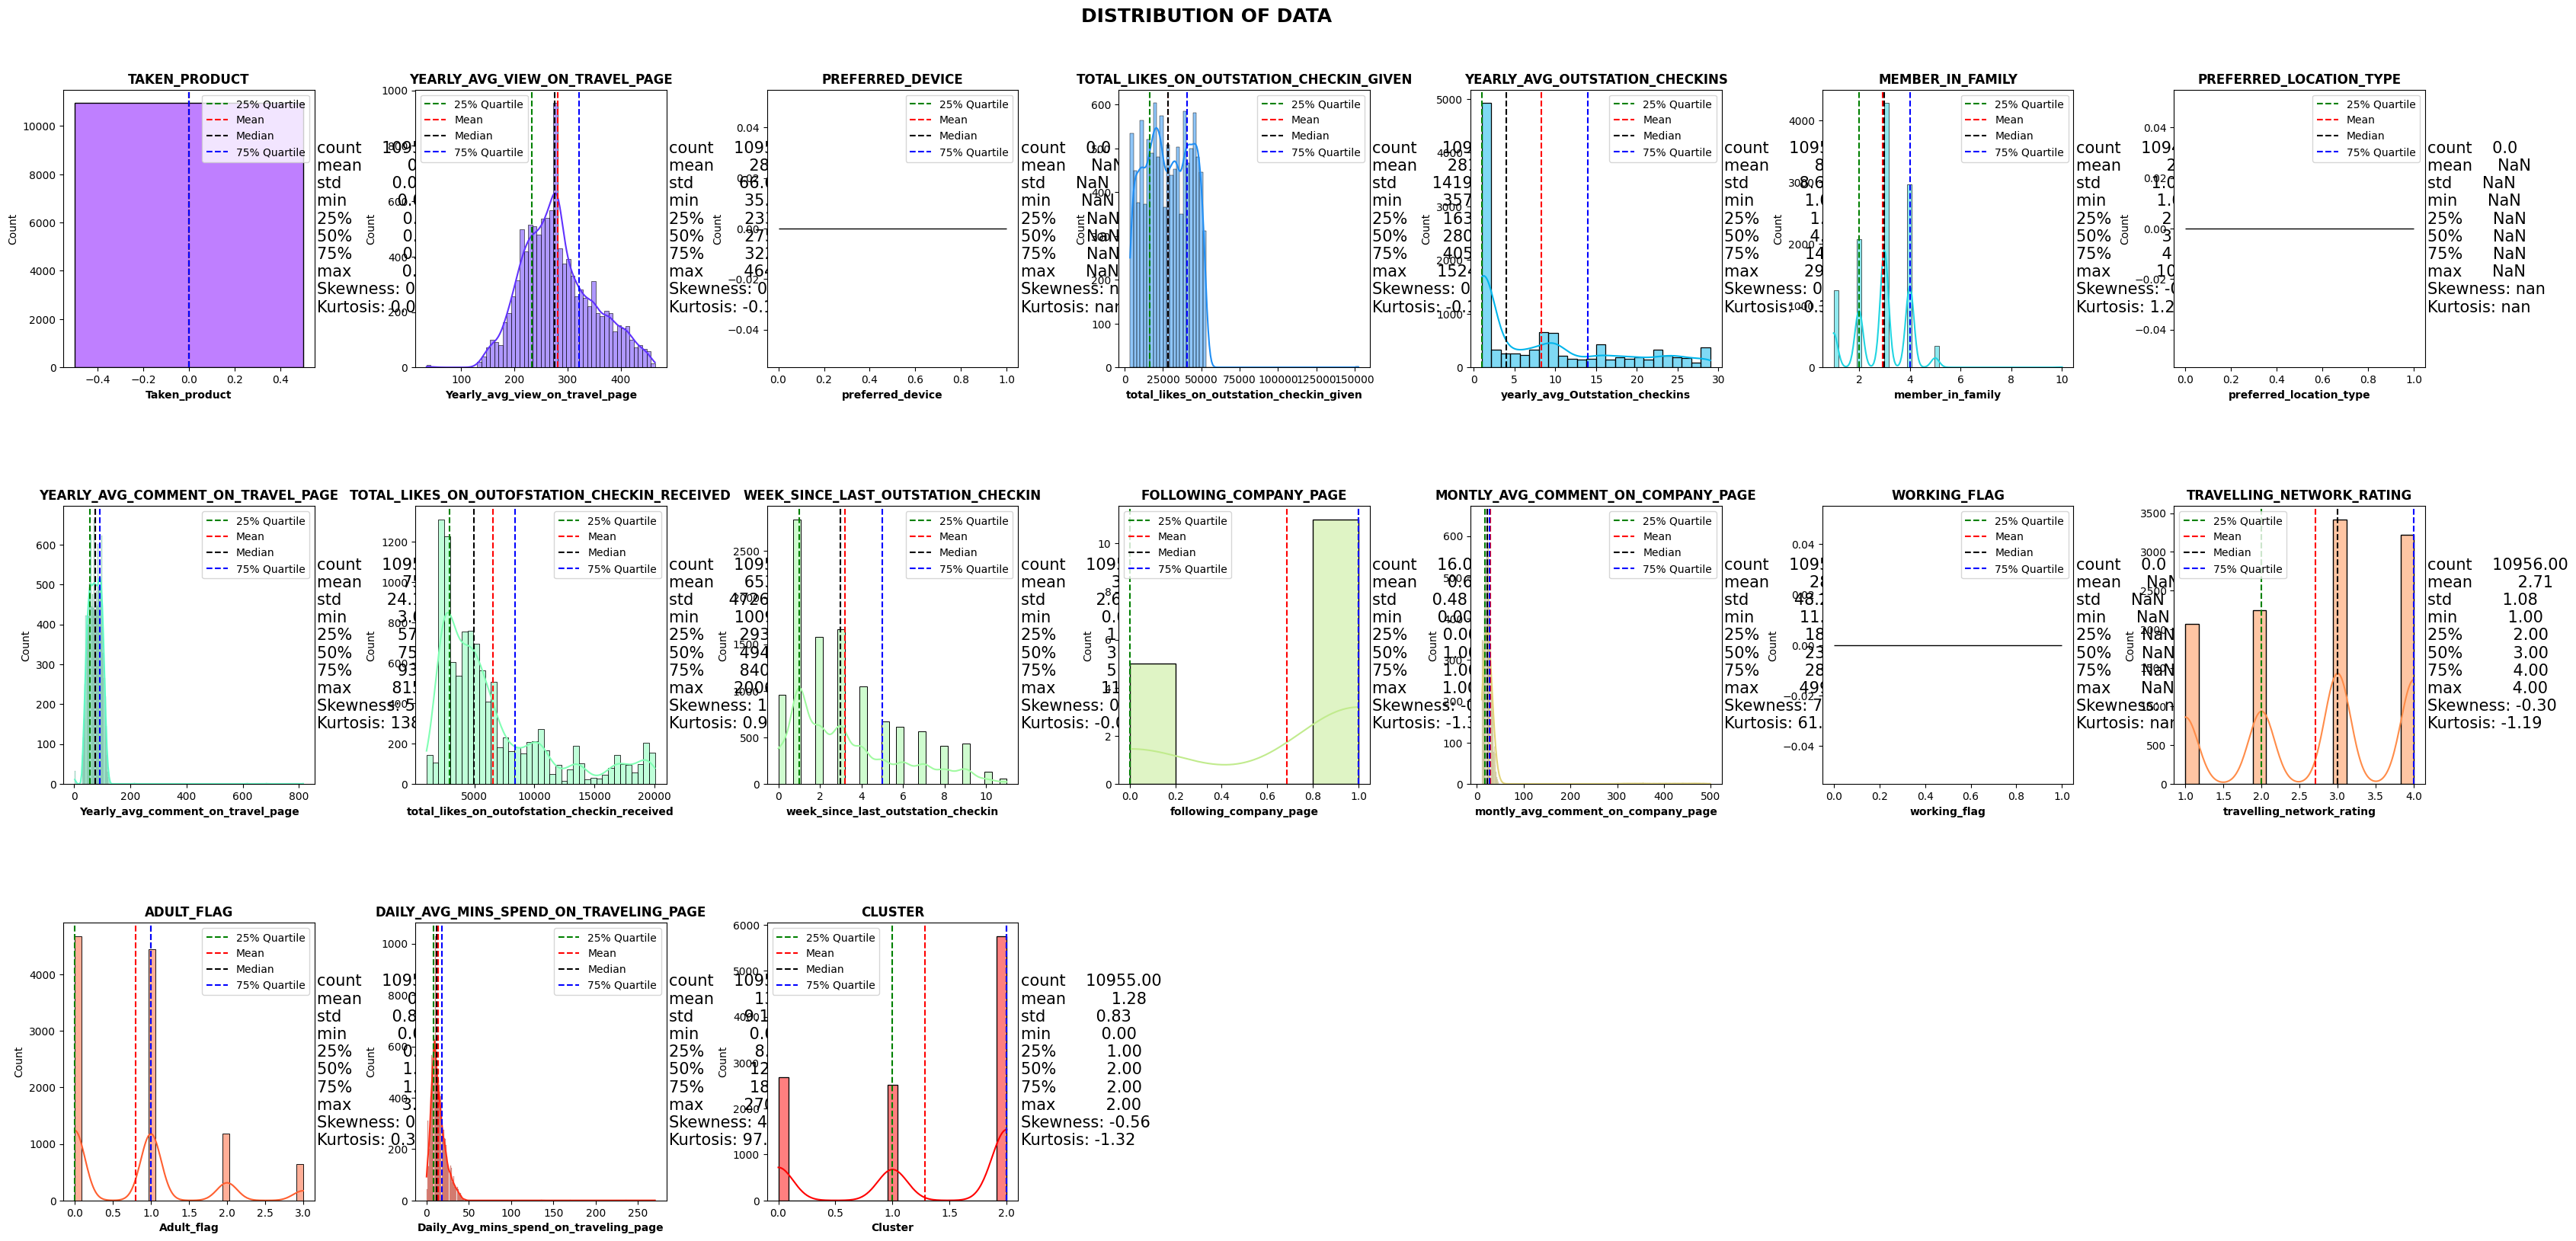

In [129]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('UserID')

axlab_dict = {'fontsize': 10, 'fontweight': 'bold'}
axtitle_dict = {'fontsize': 12, 'fontweight': 'bold'}

plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[40, 18])  # Increase height to accommodate more subplots
fig.suptitle('DISTRIBUTION OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
colours = plt.cm.rainbow(np.linspace(0, 1, len(num_columns), endpoint=True))

rows = 3
cols = (len(num_columns) // rows) + (len(num_columns) % rows)  # Adjust the grid size to fit the number of columns

for i, col in enumerate(num_columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    sns.histplot(df[col], color=colours[i], ax=ax, kde=True)
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
    skewness = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)
    description_lines = [line for line in str(df[col].describe().round(2)).split('\n') if 'Name' not in line and 'dtype' not in line]
    description_text = '\n'.join(description_lines)
    description_text += f"\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    ax.annotate(description_text, xy=(1.01, 0.2), xycoords='axes fraction', fontsize=15)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}', fontdict=axtitle_dict)
    ax.legend(fontsize=10)
plt.show()

# Since Helvetica is not available, let's use Arial as a fallback font
plt.rcParams['font.sans-serif'] = 'Arial'

In [130]:
#Feature Selection

# Import the necessary module
from sklearn.preprocessing import LabelEncoder

#turning categorical data into numerical data
import pandas as pd
df = pd.read_csv('/content/data.csv')
df['Yearly_avg_view_on_travel_page'].fillna(df['Yearly_avg_view_on_travel_page'].median(), inplace=True)
df['Taken_product'].fillna(df['Taken_product'].mode()[0], inplace=True)
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
encoded_df = df.copy()
for column in ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                     'yearly_avg_Outstation_checkins', 'member_in_family',
                     'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received',
                     'week_since_last_outstation_checkin', 'following_company_page',
                     'montly_avg_comment_on_company_page', 'working_flag',
                     'travelling_network_rating', 'Adult_flag',
                     'Daily_Avg_mins_spend_on_traveling_page']:
    encoded_df[column] = label_encoder.fit_transform(df[column])

print(encoded_df)

        UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0      1000001           Yes                             173  iOS and Android   
1      1000002            No                             233              iOS   
2      1000003           Yes                             143  iOS and Android   
3      1000004            No                             113              iOS   
4      1000005            No                              68  iOS and Android   
...        ...           ...                             ...              ...   
11755  1011756            No                             145           Laptop   
11756  1011757            No                             171              Tab   
11757  1011758            No                              80              Tab   
11758  1011759            No                             248           Laptop   
11759  1011760            No                             136              Tab   

       total_likes_on_outst

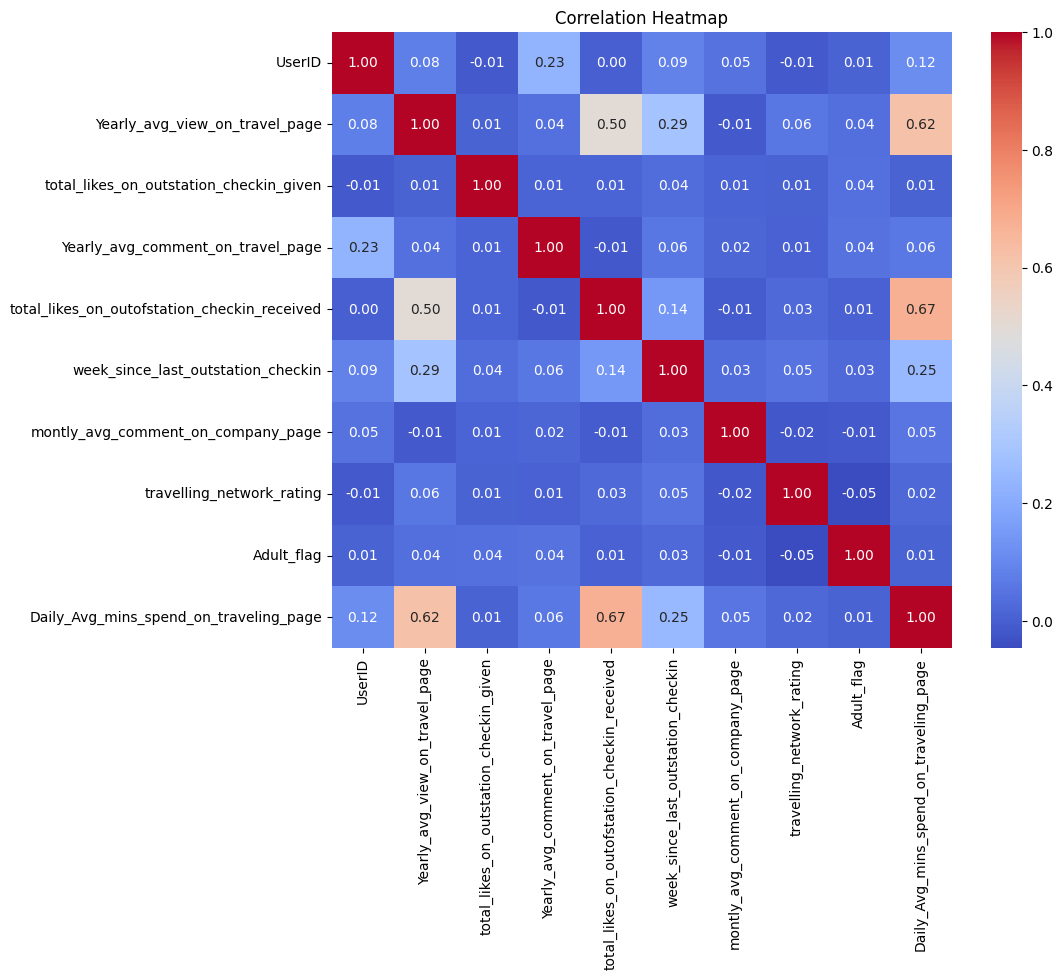

In [131]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Specify the font settings
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the data
df = pd.read_csv('/content/data.csv')

# Filter out non-numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [132]:
funnel_data = df[['UserID', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page', 'Taken_product']].copy()

funnel_stages = ['View Travel Page', 'Comment on Travel Page', 'Buy Product']

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
funnel_data['Buy Product'] = (funnel_data['Taken_product'] == 'Yes').astype(int)

# Calculate the percentage of users at each stage
funnel_data['View Travel Page'] = funnel_data['Yearly_avg_view_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)
funnel_data['Comment on Travel Page'] = funnel_data['Yearly_avg_comment_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)

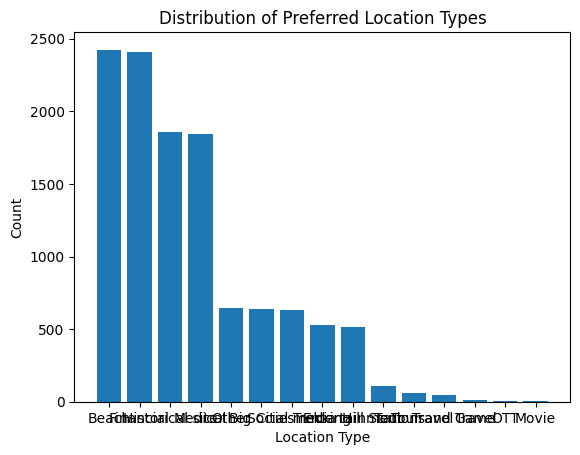

In [133]:
# Count the occurrences of each location type
location_counts = df['preferred_location_type'].value_counts()

# Create a bar chart
plt.bar(location_counts.index, location_counts.values)
plt.title("Distribution of Preferred Location Types")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.show()

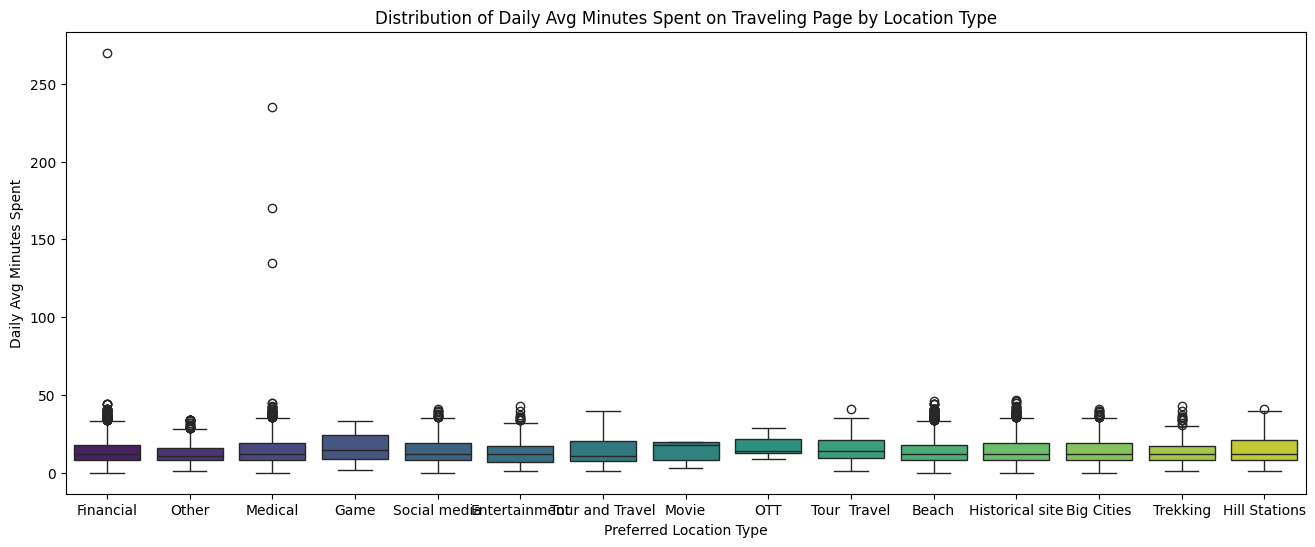

In [134]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='preferred_location_type', y='Daily_Avg_mins_spend_on_traveling_page', hue='preferred_location_type', data=df, palette='viridis', legend=False)
plt.title('Distribution of Daily Avg Minutes Spent on Traveling Page by Location Type')
plt.xlabel('Preferred Location Type')
plt.ylabel('Daily Avg Minutes Spent')
plt.show()

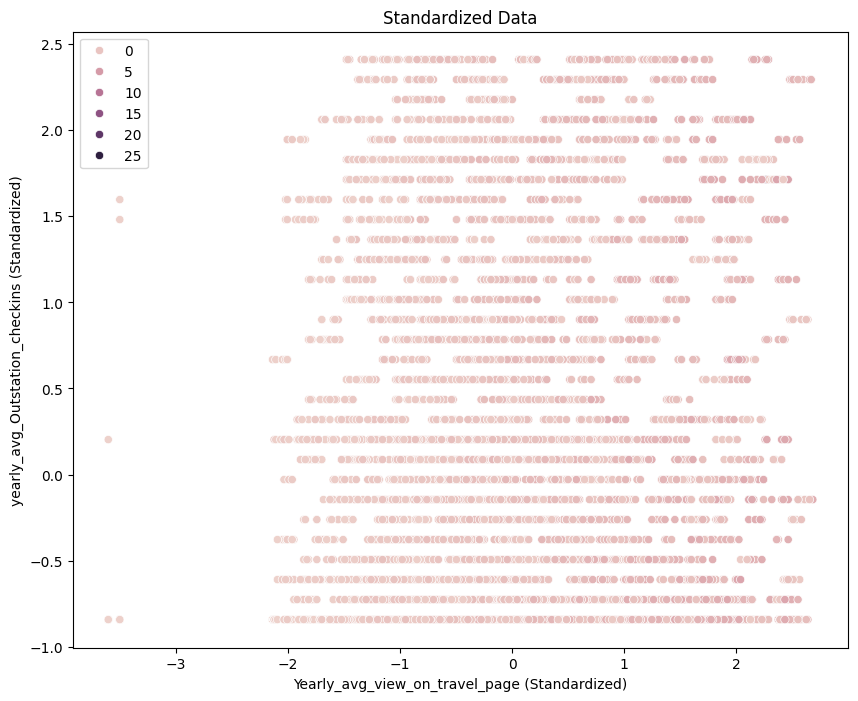

In [135]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Remove any characters that cannot be converted to float
df_clustering = df_clustering.applymap(lambda x: np.nan if isinstance(x, str) and ('*' in x or pd.isna(x)) else x)
df_clustering = df_clustering.dropna()

# Extract the selected features
X = df_clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=X_scaled[:, 2])
plt.title('Standardized Data')
plt.xlabel('Yearly_avg_view_on_travel_page (Standardized)')
plt.ylabel('yearly_avg_Outstation_checkins (Standardized)')
plt.show()

In [147]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame containing the data
# Select the columns for clustering
columns_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']

# Replace non-numeric values ('*') with NaN
df[columns_for_clustering] = df[columns_for_clustering].replace('*', np.nan)

# Create a new DataFrame with selected columns
data_for_clustering = df[columns_for_clustering]

# Create an imputer object with the chosen strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform the data
data_imputed = imputer.fit_transform(data_for_clustering)

# Preprocessing: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Choose the number of clusters (k)
num_clusters = 3  # You can adjust this value based on domain knowledge or using methods like the Elbow method

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



    UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family  preferred_location_type  \
0                2         

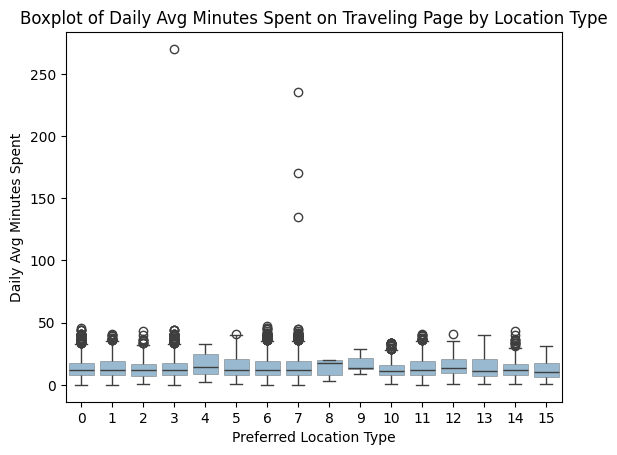

In [138]:
# Import the necessary module
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
encoded_df = df.copy()
for column in ['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given',
                     'yearly_avg_Outstation_checkins', 'member_in_family',
                     'Yearly_avg_comment_on_travel_page', 'total_likes_on_outofstation_checkin_received',
                     'week_since_last_outstation_checkin', 'following_company_page',
                     'montly_avg_comment_on_company_page', 'working_flag',
                     'travelling_network_rating', 'Adult_flag',
                     'Daily_Avg_mins_spend_on_traveling_page']:
    encoded_df[column] = label_encoder.fit_transform(df[column])

# Encode the categorical data in the 'preferred_location_type' column
df['preferred_location_type'] = label_encoder.fit_transform(df['preferred_location_type'])

# Plot the boxplot using the encoded data
sns.boxplot(
    x="preferred_location_type",
    y="Daily_Avg_mins_spend_on_traveling_page",
    data=df,
    boxprops=dict(linewidth=0.5, zorder=2, alpha=0.5)
)

plt.title("Boxplot of Daily Avg Minutes Spent on Traveling Page by Location Type")
plt.xlabel("Preferred Location Type")
plt.ylabel("Daily Avg Minutes Spent")
plt.show()



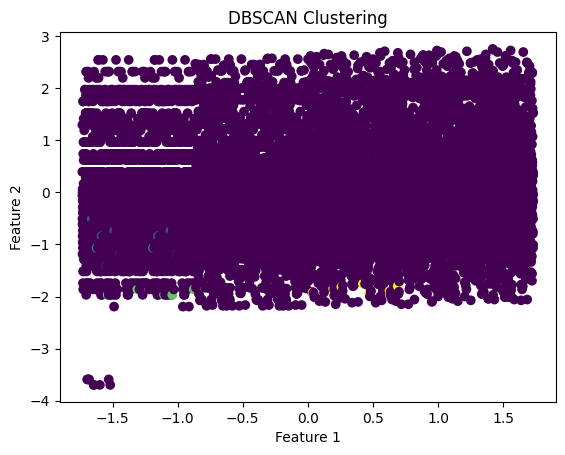

In [139]:
# Handle missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df[numeric_columns])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # adjust eps and min_samples as needed
clusters = dbscan.fit_predict(data_scaled)

# Create a graph and add nodes for each data point
G = nx.Graph()
for i in range(len(data_scaled)):
    G.add_node(i, cluster=clusters[i])  # Assign the cluster label as a node attribute

# Visualize the clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()